In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn import metrics 

In [46]:
from sklearn import tree

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [3]:
heart=pd.read_csv('heart.csv')

In [4]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

<AxesSubplot:xlabel='sex', ylabel='count'>

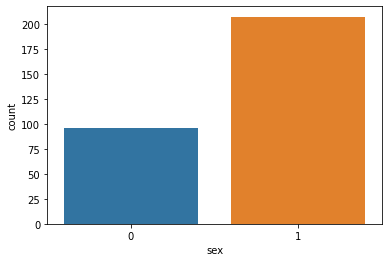

In [5]:
sns.countplot(data=heart,x='sex')

<AxesSubplot:xlabel='target', ylabel='count'>

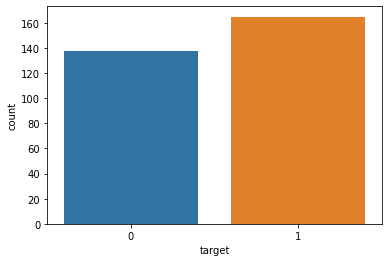

In [6]:
sns.countplot(data=heart,x='target')

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

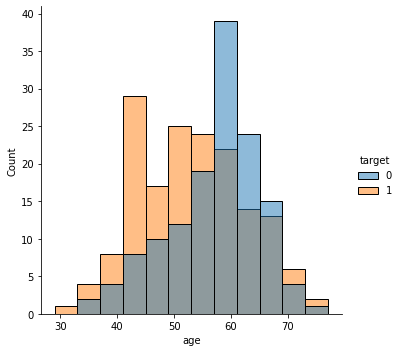

In [7]:
sns.displot(x=heart['age'],kind='hist', hue = heart['target'])

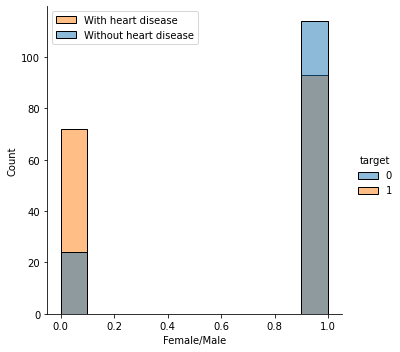

In [8]:
sns.displot(x=heart['sex'],kind='hist', hue = heart['target'])
plt.xlabel('Female/Male')
plt.legend(loc='upper left',labels=['With heart disease','Without heart disease'])

Text(0.5, 0, 'Chest pains')

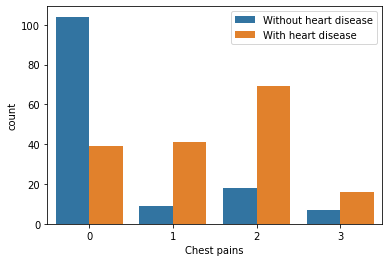

In [9]:
sns.countplot(x=heart.cp,hue=heart.target)
plt.legend(loc='upper right',labels=['Without heart disease','With heart disease'])
plt.xlabel('Chest pains')

In [12]:
x = heart.iloc[:,:-1]
y = heart.target

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
y_test.shape

(91,)

In [42]:
y_test.value_counts()

1    50
0    41
Name: target, dtype: int64

## Decision Tree

In [97]:
dtree = DecisionTreeClassifier(min_samples_leaf=10)

In [98]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [99]:
dtree.score(x_test,y_test)

0.8021978021978022

In [68]:
dtree_1 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10)

In [69]:
dtree_1.fit(x_train,y_train)
dtree_1.score(x_test,y_test)

0.8021978021978022

In [23]:
dtree.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [70]:
metrics.classification_report(y_test,dtree.predict(x_test),output_dict=True)

{'0': {'precision': 0.7674418604651163,
  'recall': 0.8048780487804879,
  'f1-score': 0.7857142857142858,
  'support': 41},
 '1': {'precision': 0.8333333333333334,
  'recall': 0.8,
  'f1-score': 0.816326530612245,
  'support': 50},
 'accuracy': 0.8021978021978022,
 'macro avg': {'precision': 0.8003875968992249,
  'recall': 0.802439024390244,
  'f1-score': 0.8010204081632655,
  'support': 91},
 'weighted avg': {'precision': 0.8036459664366641,
  'recall': 0.8021978021978022,
  'f1-score': 0.8025342004933842,
  'support': 91}}

In [71]:
metrics.confusion_matrix(y_test,dtree.predict(x_test),labels=(1,0))

array([[40, 10],
       [ 8, 33]], dtype=int64)

In [72]:
metrics.classification_report(y_test,dtree.predict(x_test),output_dict=True)['accuracy']

0.8021978021978022

In [73]:
print(metrics.classification_report(y_test,dtree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [74]:
print(metrics.classification_report(y_train,dtree.predict(x_train)))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        97
           1       0.87      0.90      0.89       115

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212



[Text(186.0, 199.32, 'X[11] <= 0.5\ngini = 0.496\nsamples = 212\nvalue = [97, 115]'),
 Text(111.60000000000001, 163.07999999999998, 'X[12] <= 2.5\ngini = 0.381\nsamples = 129\nvalue = [33, 96]'),
 Text(74.4, 126.83999999999999, 'X[9] <= 1.55\ngini = 0.18\nsamples = 90\nvalue = [9, 81]'),
 Text(55.800000000000004, 90.6, 'X[0] <= 58.5\ngini = 0.098\nsamples = 77\nvalue = [4, 73]'),
 Text(37.2, 54.359999999999985, 'X[3] <= 113.5\ngini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(18.6, 18.119999999999976, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(55.800000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]'),
 Text(74.4, 54.359999999999985, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(93.0, 90.6, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(148.8, 126.83999999999999, 'X[8] <= 0.5\ngini = 0.473\nsamples = 39\nvalue = [24, 15]'),
 Text(130.20000000000002, 90.6, 'X[0] <= 53.0\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(111.600000

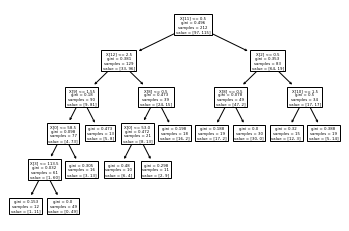

In [75]:
tree.plot_tree(dtree)

## Random Forest

In [110]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=10)

In [111]:
rf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=50)

In [112]:
rf.score(x_test,y_test)

0.8351648351648352

In [151]:
accuracy=[]
index=[]
for i in range(1,150):
    rf = RandomForestClassifier(n_estimators=i, min_samples_leaf=10)
    rf.fit(x_train,y_train)
    accuracy.append(rf.score(x_test,y_test))
    index.append(i)

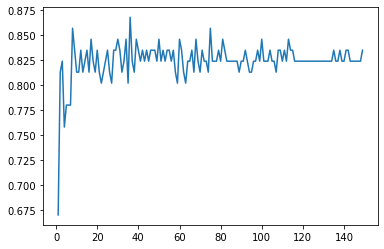

In [152]:
plt.plot(index,accuracy)

In [153]:
for i in range(len(accuracy)):
    if accuracy[i] == max(accuracy):
        print(i,accuracy[i])

35 0.8681318681318682


In [154]:
print(metrics.classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



### Randomized Search

In [168]:
param_rand = {'n_estimators': np.arange(100,800,100),
             'min_samples_leaf': [2,5,10],
             'min_samples_split': [5,10,15],
             'max_depth': np.arange(0,50,5)}

In [167]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [169]:
ran_search=RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_rand, n_iter=100, cv=3, verbose=2, random_state=42,n_jobs=-1)

In [170]:
ran_search.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700])},
                   random_state=42, verbose=2)

In [176]:
ran_search.score(x_test,y_test)

0.8241758241758241

In [177]:
ran_search.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [178]:
print(metrics.classification_report(y_test,ran_search.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

